In [64]:
import pandas as pd
unlabeled_final = pd.read_csv('data_unlabled_data_final_version2.csv',sep=',',encoding = "ISO-8859-1")
confirmed_maclious_final = pd.read_csv('data_confirmed_CovidURL_final_version2.csv',sep=',',encoding = "ISO-8859-1")
white_list_final = pd.read_csv('data_Confirmed_whitelist_final_version2.csv',sep=',',encoding = "ISO-8859-1")
Bing_final = pd.read_csv('Bing_final_version.csv',sep=',',encoding = "ISO-8859-1")
phish_tank_final = pd.read_csv('phish_tank_final_version.csv',sep=',',encoding = "ISO-8859-1")

In [3]:
unlabeled_final.head()

,Unified_url,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,Contain_Weried_number_combination,levenshtein_distance,Alexa_rank,Status_code,start_date,wildcard_subdomain,Redirect_URL,Created on 2020
0,http://coronavirusemploymentservices.com,1,0,0,0,6,0,0.050000,0,2,0,14,0,200,2018,0,0,0
1,http://coronavirusen.com,0,0,0,0,5,0,0.083333,0,2,0,3,0,503,0,0,0,0
2,http://coronavirusencasa.com,0,0,0,0,6,0,0.071429,0,2,0,5,0,503,0,0,0,0
3,http://coronavirusencolombia.com,0,0,0,0,6,0,0.062500,0,2,0,8,1,404,2009,0,0,0
4,http://coronavirusend.com,1,0,0,0,5,0,0.080000,0,2,0,3,0,200,2018,1,0,0


In [4]:
url_unlabeled = unlabeled_final['Unified_url']
url_phishtank = phish_tank_final['Unified_url']

In [19]:
url_unlabeled_dom = []
getattr(tqdm, '_instances', {}).clear()
for i in tqdm(url_unlabeled):
    hostname = i
    pattern = "https://|http://|www.|https://www.|http://www."
    pre_pattern_match = re.search(pattern, hostname)
    if pre_pattern_match:
        hostname = hostname[pre_pattern_match.end():]
        post_pattern_match = re.search("/", hostname)
        if post_pattern_match:
            hostname = hostname[:post_pattern_match.start()]
        char1 = hostname
        url_unlabeled_dom.append(char1)

100%|██████████| 229489/229489 [00:00<00:00, 405352.94it/s]


In [20]:
url_phishtank_dom = []
getattr(tqdm, '_instances', {}).clear()
for i in tqdm(url_phishtank):
    hostname = i
    pattern = "https://|http://|www.|https://www.|http://www."
    pre_pattern_match = re.search(pattern, hostname)
    if pre_pattern_match:
        hostname = hostname[pre_pattern_match.end():]
        post_pattern_match = re.search("/", hostname)
        if post_pattern_match:
            hostname = hostname[:post_pattern_match.start()]
        char1 = hostname
        url_phishtank_dom.append(char1)

100%|██████████| 98251/98251 [00:00<00:00, 393345.74it/s]


In [21]:
from tqdm import tqdm
common_list = []
for i in tqdm(url_unlabeled_dom):
    for j in url_phishtank_dom:
        if i == j:
             common_list.append(j)

100%|██████████| 229489/229489 [18:44<00:00, 204.12it/s]


In [25]:
phish_list = []
key_word = ['covid','virus','corna','c0vid','cov1d']
for i in tqdm(url_phishtank_dom):
    for j in key_word:
        if j in i:
            phish_list.append(i)

100%|██████████| 98251/98251 [00:00<00:00, 1281464.27it/s]


In [27]:
import numpy as np
phish_list_phishtank = np.unique(phish_list + common_list)

In [32]:
import wordninja
import http
import urllib.request, urllib.error
from math import log
from socket import timeout
def Feature_extraction(List_all):

    def Extract_FTLD(List_all):
        Freenom_top_level_domain = []
        for i in List_all:
            if i[-2:] == 'ml':
                Freenom_top_level_domain.append(1)
            elif i[-2:] == 'cf':
                Freenom_top_level_domain.append(1)
            elif i[-2:] == 'gq':
                Freenom_top_level_domain.append(1)
            elif i[-2:] == 'tk':
                Freenom_top_level_domain.append(1)
            elif i[-2:] == 'ga':
                Freenom_top_level_domain.append(1)
            else:
                Freenom_top_level_domain.append(0)
        return Freenom_top_level_domain

    def Previous_MTLD(List_all):
    # According to https://blogs.akamai.com/2019/10/a-view-into-top-level-domain-tld-abuse.html?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+TheAkamaiBlog+%28The+Akamai+Blog%29
    # According to https://www.anomali.com/blog/abusing-the-mali-cctld-ml-to-target-dutch-organisations
        Previous_malicious_top_level_domain_TLD = []
        for i in List_all:
            if i[-2:] == 'ml':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-2:] == 'cf':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-2:] == 'so':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-4:] == 'loan':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-5:] == 'tokyo':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-5:] == 'trade':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-6:] == 'stream':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-3:] == 'bid':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-3:] == 'icu':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-3:] == 'gdn':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-3:] == 'win':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-4:] == 'work':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-4:] == 'desi':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-4:] == 'pics':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-2:] == 'gq':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-2:] == 'tk':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-2:] == 'vg':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-2:] == 'ga':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-2:] == 'to':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-2:] == 'cc':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-2:] == 'hk':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-2:] == 'pw':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-2:] == 'fm':
                Previous_malicious_top_level_domain_TLD.append(1)
            elif i[-2:] == 'la':
                Previous_malicious_top_level_domain_TLD.append(1)
            else:
                Previous_malicious_top_level_domain_TLD.append(0)
        return Previous_malicious_top_level_domain_TLD

    def mixed_feature(List_all):
        # Build a cost dictionary, assuming Zipf's law and cost = -math.log(probability).
        # words = open("words-by-frequency.txt").read().split()
        # wordcost = dict((k, log((i+1)*log(len(words)))) for i,k in enumerate(words))
        # maxword = max(len(x) for x in words)

        def infer_spaces(s):
            """Uses dynamic programming to infer the location of spaces in a string
            without spaces."""

            # Find the best match for the i first characters, assuming cost has
            # been built for the i-1 first characters.
            # Returns a pair (match_cost, match_length).
            def best_match(i):
                candidates = enumerate(reversed(cost[max(0, i-maxword):i]))
                return min((c + wordcost.get(s[i-k-1:i], 9e999), k+1) for k,c in candidates)

            # Build the cost array.
            cost = [0]
            for i in range(1,len(s)+1):
                c,k = best_match(i)
                cost.append(c)

            # Backtrack to recover the minimal-cost string.
            out = []
            i = len(s)
            while i>0:
                c,k = best_match(i)
                assert c == cost[i]
                out.append(s[i-k:i])
                i -= k

            return " ".join(reversed(out))

        # This would take some time
        word_dic = []
        number_mark = []
        Name_length = []
        Wrong_spell = ["cov1d","c0v1d","c0vid","c0rona","c0r0na","cor0na","v1rus","coivd",'co1vd']
        Wrong_spell = Wrong_spell 
        Wrong_spell_List = []

        for i in List_all:
        #     reduce the prefix and sufix
            temp_mark = 0
            for j in Wrong_spell:
                if j in i:
                    temp_mark += 1          
            if temp_mark>0:
                Wrong_spell_List.append(1)
            else:
                Wrong_spell_List.append(0)
            original_len = len(i) - 2 
            Each_List = wordninja.split(i)
            Name_length.append(len(Each_List))
            stand = 0
            for j in Each_List:
                if str.isdigit(j) is True:
                    number_mark.append(1)
                    stand = 1
                break
            if stand==0:
                number_mark.append(0)
            longest_element = max([(len(x),x) for x in Each_List])
            Ratio = len(longest_element)/original_len
            word_dic.append(Ratio)
        print("The produced word ratio list's length is ",len(word_dic))
        print("The sample data is",word_dic[0:6])
        return Name_length, Wrong_spell_List,word_dic

    def Find_Dash_mark(List_all):
        Special_mark = []
        for i in List_all:
            if '-' in i:
        #         print(i)
                Special_mark.append(1)
            else:
                Special_mark.append(0)
        print("The number of domains cotain symbol '-':",Special_mark.count(1))
        return Special_mark

    def Count_subdomain(List_all):
        sub_domain = []
        for i in List_all:
            dot_num = i.count('.') 
            sub_domain.append(dot_num)
        return sub_domain

    def Contain_IP_address(List_all):
        import re
        Contain_IP_Adress = []
        for i in List_all:
            IP = re.findall(r".\d.\d.\d",i)
            if len(IP) == 0:
                Contain_IP_Adress.append(0)
            else:
                Contain_IP_Adress.append(1)
        print("The number of domain contain IP adress is",Contain_IP_Adress.count(1))
        return Contain_IP_Adress 
    import requests
    from tqdm import tqdm
    from bs4 import BeautifulSoup
    import json
    Alexa_rank_phish_w = []
    Status_phish_w = []
    getattr(tqdm, '_instances', {}).clear()
    for i in tqdm(List_all):
        url1 = 'https://awis.api.alexa.com/api?Action=UrlInfo&Count=10&ResponseGroup=Rank,LinksInCount&Start=1&Url='
        url = url1+i
        headers={'x-api-key':'R90lWSm4iC6L6zDUZnZgs8UmqmtUCFrB6fCT2EY5'}
        response = requests.get(url,headers=headers)
        soup = BeautifulSoup(response.text, 'lxml')
        try:
            statuscode = soup.findAll("statuscode")[0].string
            if statuscode is None:
                Status_phish_w.append(0)
            else:
                Status_phish_w.append(statuscode)
        except (IndexError,ConnectionError):
                Status_phish_w.append(0)
                print("sa")
                print(i)
        try:
            rank = soup.findAll("rank")[0].string
            if rank is None:
                Alexa_rank_phish_w.append(0)
            else:
                Alexa_rank_phish_w.append(rank)
        except (IndexError,ConnectionError):
                Alexa_rank_phish_w.append(0)
                print("wa")
                print(i)
    way_back_phish_w = []
    time_stamp_phish_w = []
    reachable_url_phish_w = []
    
    getattr(tqdm, '_instances', {}).clear()
    for i in tqdm(List_all):
        try:
            url1 = 'https://archive.org/wayback/available?url='
            url = url1 + i
            response = requests.get(url,timeout=1)
            json_data = json.loads(response.text)
            status= response.status_code
            if status == 200:
                reachable_url_phish_w.append(1)
            else:
                reachable_url_phish_w.append(0)
            if bool(json_data['archived_snapshots']) is False:
                way_back_phish_w.append(0)
                time_stamp_phish_w.append(0)
            else:
                way_back_phish_w.append(1)
                time_stamp_phish_w.append(json_data['archived_snapshots']['closest']['timestamp'])

        except requests.Timeout as err:
            way_back_phish_w.append(0)
            time_stamp_phish_w.append(0)
            reachable_url_phish_w.append(0)
    check_404_phishtank2 = []
    getattr(tqdm, '_instances', {}).clear()
    for i in tqdm(List_all):
        url = 'https://'+i
        try:
            conn = urllib.request.urlopen(url,timeout = 10)
        except urllib.error.HTTPError as e:
            check_404_phishtank2.append(e.code)
        except urllib.error.URLError as e:
            # Not an HTTP-specific error (e.g. connection refused)
            # ...
            check_404_phishtank2.append(e.reason)
        except ConnectionError as e:
            check_404_phishtank2.append(e)
        except timeout:
             check_404_phishtank2.append('time out')
        except http.client.BadStatusLine as e:
            check_404_phishtank2.append('unknown structure')
        except http.client.InvalidURL as e:
            check_404_phishtank2.append('url error')
        else:
            # 200
            # ...
            check_404_phishtank2.append(200)
    
    
    
    Freenom_top_level_domain = Extract_FTLD(List_all)
    Previous_malicious_top_level_domain_TLD = Previous_MTLD(List_all)
    Name_length, Wrong_spell_List, word_dic = mixed_feature(List_all)
    Special_mark = Find_Dash_mark(List_all)
    sub_domain = Count_subdomain(List_all)
    Contain_IP_Adress = Contain_IP_address(List_all)
    return Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length, Wrong_spell_List,word_dic,Special_mark,sub_domain,Contain_IP_Adress,Alexa_rank_phish_w,way_back_phish_w,check_404_phishtank2

Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length, Wrong_spell_List,word_dic,Special_mark,sub_domain,Contain_IP_Adress,Alexa_rank_phish_w,way_back_phish_w,check_404_phishtank2 = Feature_extraction(phish_list_phishtank)
Status_code = []
for i in check_404_phishtank2:
    i = str(i)
#     print(i[:3])
    if i[0] == '[':
        Status_code.append(500)
    elif i[0] == 't':
        Status_code.append(598)
    else:
        i = int(i)
        Status_code.append(i)
def extract_feature_from_status(templist):
    blocked_list = []
    redirected_list = []
    Reachable_list = []
    for i in templist:
        i = int(i)
        if i < 300:
            Reachable_list.append(1)
        else:
            Reachable_list.append(0)
    for i in templist:
        i = int(i)
        if i > 200 and i < 400:
            redirected_list.append(1)
        else:
            redirected_list.append(0)
    for i in templist:
        i = int(i)
        if i > 400:
            blocked_list.append(1)
        else:
            blocked_list.append(0)
    return Reachable_list,redirected_list

Reachable_list_unlabeled, redirected_list_unlabeled =  extract_feature_from_status(Status_code)

import numpy as np
confirmed_phishing_website = []
f = open("ConfirmedPhishing.txt", "r")
for x in f:
    confirmed_phishing_website.append('http://'+ x[3:-4])
    
def get_hostname_from_url(url):
    hostname = url
    # TODO: Put this pattern in patterns.py as something like - get_hostname_pattern.
    pattern = "https://|http://|www.|https://www.|http://www."
    pre_pattern_match = re.search(pattern, hostname)

    if pre_pattern_match:
        hostname = hostname[pre_pattern_match.end():]
        post_pattern_match = re.search("/", hostname)
        if post_pattern_match:
            hostname = hostname[:post_pattern_match.start()]

    return hostname

def levenshtein(source,target):
    if len(source) < len(target):
        return levenshtein(target, source)

    # So now we have len(source) >= len(target).
    if len(target) == 0:
        return len(source)
    source = np.array(tuple(source))
    target = np.array(tuple(target))
    previous_row = np.arange(target.size + 1)
    for s in source:
        # Insertion (target grows longer than source):
        current_row = previous_row + 1
        current_row[1:] = np.minimum(
                current_row[1:],
                np.add(previous_row[:-1], target != s))

        # Deletion (target grows shorter than source):
        current_row[1:] = np.minimum(
                current_row[1:],
                current_row[0:-1] + 1)

        previous_row = current_row

    return previous_row[-1]

def cal_min_lev(source, target):
    min_dis_list = []
    for i in tqdm(source):
        i  = get_hostname_from_url(i)
        temp_list = []
        for j in target:
            j = get_hostname_from_url(j)
            temp_list.append(levenshtein(i,j))
        min_dis_list.append(min(temp_list))
    return min_dis_list

lev_dis = cal_min_lev(phish_list_phishtank, confirmed_phishing_website)
import subprocess
import re 
from tqdm import tqdm
def dig_wildCard_domain(url_list):
    wildcard_subdomain = []
    getattr(tqdm, '_instances', {}).clear()
    for url in tqdm(url_list):
        char = url
        if char[:3] == 'www':
            position = [m.start() for m in re.finditer('[.]',url)]
            char = url[position[0]:][1:]
            search_char = '*' + '.' + char
#             print(search_char)
            out = subprocess.Popen(['dig', '+short', search_char], 
                   stdout=subprocess.PIPE, 
                   stderr=subprocess.STDOUT)
            stdout,stderr = out.communicate()
            if len(stdout)!= 0:
                wildcard_subdomain.append(1)
            else:
                wildcard_subdomain.append(0)
        else:   
            search_char = '*' + '.' + char
#             print(search_char)
            out = subprocess.Popen(['dig', '+short', search_char], 
                   stdout=subprocess.PIPE, 
                   stderr=subprocess.STDOUT)
            stdout,stderr = out.communicate()
#             print(stdout)
            if len(stdout)!= 0:
                wildcard_subdomain.append(1)
            else:
                wildcard_subdomain.append(0)
    return wildcard_subdomain
wildcard_subdomain_Bing = dig_wildCard_domain(phish_list_phishtank)
import whois
from tqdm import tqdm
import re
import time
import subprocess
Init_date_list21 = []
getattr(tqdm, '_instances', {}).clear()
for i in tqdm(phish_list_phishtank):
    try:
        hostname = i
        char = hostname
        if char[-6:] == 'online':
            out = subprocess.Popen(['whois',  char], 
            stdout=subprocess.PIPE, 
            stderr=subprocess.STDOUT)
            stdout,stderr = out.communicate()
            stdout = stdout.decode('utf-8')
            created_date1 = re.search('created:',stdout).end()
            created_date2 = re.search('changed:',stdout).start()
            Init_date_list21.append(int(stdout[created_date1+6:created_date2][:4]))
        elif char[-2:] == 'ws':
            out = subprocess.Popen(['whois',  char], 
            stdout=subprocess.PIPE, 
            stderr=subprocess.STDOUT)
            stdout,stderr = out.communicate()
            stdout = stdout.decode('utf-8')
            created_date1 = re.search('created:',stdout).end()
            created_date2 = re.search('changed:',stdout).start()
            Init_date_list21.append(int(stdout[created_date1+6:created_date2][:4]))        
        else:
            domain = whois.query(char)
            init_date = domain.creation_date
            Init_date_list21.append(init_date.year)
    except whois.UnknownTld:
        out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        try:
            stdout = stdout.decode('utf-8')
            try:
                created_date1 = re.search('created:',stdout).end()
                created_date2 = re.search('changed:',stdout).start()
                Init_date_list21.append(int(stdout[created_date1+6:created_date2][:4]))
            except AttributeError:
                Init_date_list21.append(0)
        except UnicodeDecodeError:
            stdout = stdout.decode('ISO-8859-1')
            created_date1 = re.search('created:',stdout).end()
            created_date2 = re.search('changed:',stdout).start()
            Init_date_list21.append(int(stdout[created_date1+6:created_date2][:4]))
    except AttributeError as e:
        out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        stdout = stdout.decode('utf-8')
        try:
            created_date1 = re.search('created:',stdout).end()
            created_date2 = re.search('changed:',stdout).start()
            Init_date_list21.append(int(stdout[created_date1+6:created_date2][:4]))
        except AttributeError as e:
            Init_date_list21.append(0)
    except KeyError:
        out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        stdout = stdout.decode('utf-8')
        created_date1 = re.search('created:',stdout).end()
        created_date2 = re.search('changed:',stdout).start()
        Init_date_list21.append(int(stdout[created_date1+6:created_date2][:4]))
    except whois.UnknownDateFormat:
        out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        try:
            stdout = stdout.decode('utf-8')
            try:
                created_date1 = re.search('created:',stdout).end()
                created_date2 = re.search('changed:',stdout).start()
                Init_date_list21.append(int(stdout[created_date1+6:created_date2][:4]))
            except AttributeError as e:
                Init_date_list21.append(2003)
        except UnicodeDecodeError:
            out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
            stdout,stderr = out.communicate()
            stdout = stdout.decode('ISO-8859-1')
            try:
                created_date1 = re.search('created:',stdout).end()
                created_date2 = re.search('changed:',stdout).start()
                Init_date_list21.append(int(stdout[created_date1+6:created_date2][:4]))
            except AttributeError:
                Init_date_list21.append(0)
            
            
    except whois.WhoisCommandFailed:
        out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        stdout = stdout.decode('utf-8')
        try:
            created_date1 = re.search('created:',stdout).end()
            created_date2 = re.search('changed:',stdout).start()
            Init_date_list21.append(int(stdout[created_date1+6:created_date2][:4]))
        except AttributeError:
            Init_date_list21.append(0)
    except UnicodeDecodeError:
        out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        stdout = stdout.decode('ISO-8859-1')
        try:
            created_date1 = re.search('created:',stdout).end()
            created_date2 = re.search('changed:',stdout).start()
            Init_date_list21.append(int(stdout[created_date1+6:created_date2][:4]))
        except AttributeError:
            Init_date_list21.append(0)
    except whois.FailedParsingWhoisOutput as e:
        out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        stdout = stdout.decode('ISO-8859-1')
        created_date1 = re.search('created:',stdout).end()
        created_date2 = re.search('changed:',stdout).start()
        Init_date_list21.append(int(stdout[created_date1+6:created_date2][:4]))

  1%|▏         | 2/158 [00:00<00:13, 11.80it/s]

The produced word ratio list's length is  158
The sample data is [0.125, 0.05555555555555555, 0.10526315789473684, 0.02531645569620253, 0.09523809523809523, 0.08695652173913043]
The number of domains cotain symbol '-': 86
The number of domain contain IP adress is 7


100%|██████████| 158/158 [02:27<00:00,  1.07it/s]


In [34]:
temp_check = []
for i in Init_date_list21:
    if i == 2020:
        temp_check.append(1)
    else:
        temp_check.append(0)

In [65]:
dict_phish_Mal = {'Unified_url':phish_list_phishtank,'Reachable_URL':Reachable_list_unlabeled,
                  'Way_back_archived':way_back_phish_w,
                   "Freenom_top_level_domain":Freenom_top_level_domain,
                   "Previous_malicious_top_level_domain_TLD":Previous_malicious_top_level_domain_TLD,
                   "Name_length":Name_length,"Wrong_spell_List":Wrong_spell_List,"Longest_word_ratio":word_dic,
                   "Special_mark":Special_mark,"sub_domain":sub_domain,
                   'Contain_Weried_number_combination':Contain_IP_Adress,
                   'levenshtein_distance':lev_dis,'Alexa_rank':Alexa_rank_phish_w,'Status_code':Status_code,"start_date":Init_date_list21,
                   "wildcard_subdomain":wildcard_subdomain_Bing,
                  'Redirect_URL':redirected_list_unlabeled,
                  
                  'Created on 2020':temp_check}
sample_data_Mal = pd.DataFrame(dict_phish_Mal)

In [71]:
confirmed_maclious_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 18 columns):
Unified_url                                394 non-null object
Reachable_URL                              394 non-null int64
Way_back_archived                          394 non-null int64
Freenom_top_level_domain                   394 non-null int64
Previous_malicious_top_level_domain_TLD    394 non-null int64
Name_length                                394 non-null int64
Wrong_spell_List                           394 non-null int64
Longest_word_ratio                         394 non-null float64
Special_mark                               394 non-null int64
sub_domain                                 394 non-null int64
Contain_Weried_number_combination          394 non-null int64
levenshtein_distance                       394 non-null int64
Alexa_rank                                 394 non-null int64
Status_code                                394 non-null int64
start_date              

In [72]:
sample_data_Mal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 18 columns):
Unified_url                                158 non-null object
Reachable_URL                              158 non-null int64
Way_back_archived                          158 non-null int64
Freenom_top_level_domain                   158 non-null int64
Previous_malicious_top_level_domain_TLD    158 non-null int64
Name_length                                158 non-null int64
Wrong_spell_List                           158 non-null int64
Longest_word_ratio                         158 non-null float64
Special_mark                               158 non-null int64
sub_domain                                 158 non-null int64
Contain_Weried_number_combination          158 non-null int64
levenshtein_distance                       158 non-null int64
Alexa_rank                                 158 non-null object
Status_code                                158 non-null int64
start_date             

In [76]:
Mal_final = pd.concat( [confirmed_maclious_final, sample_data_Mal], axis=0)

In [77]:
Mal_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 0 to 157
Data columns (total 18 columns):
Unified_url                                552 non-null object
Reachable_URL                              552 non-null int64
Way_back_archived                          552 non-null int64
Freenom_top_level_domain                   552 non-null int64
Previous_malicious_top_level_domain_TLD    552 non-null int64
Name_length                                552 non-null int64
Wrong_spell_List                           552 non-null int64
Longest_word_ratio                         552 non-null float64
Special_mark                               552 non-null int64
sub_domain                                 552 non-null int64
Contain_Weried_number_combination          552 non-null int64
levenshtein_distance                       552 non-null int64
Alexa_rank                                 552 non-null object
Status_code                                552 non-null int64
start_date             

In [78]:
temp = 0 
for i in Mal_final['start_date']:
    if i == 0:
        temp+=1
print(temp)

79


In [80]:
import whois
from tqdm import tqdm
import re
import time
import subprocess
Init_date_list17 = []
getattr(tqdm, '_instances', {}).clear()
for i in tqdm(Mal_final['Unified_url']):
    try:
        hostname = i
        pattern = "https://|http://|www.|https://www.|http://www."
        pre_pattern_match = re.search(pattern, hostname)
        if pre_pattern_match:
            hostname = hostname[pre_pattern_match.end():]
            post_pattern_match = re.search("/", hostname)
            if post_pattern_match:
                hostname = hostname[:post_pattern_match.start()]
            char = hostname
        if char[-6:] == 'online':
            out = subprocess.Popen(['whois',  char], 
            stdout=subprocess.PIPE, 
            stderr=subprocess.STDOUT)
            stdout,stderr = out.communicate()
            stdout = stdout.decode('utf-8')
            created_date1 = re.search('created:',stdout).end()
            created_date2 = re.search('changed:',stdout).start()
            Init_date_list17.append(int(stdout[created_date1+6:created_date2][:4]))
        elif char[-2:] == 'ws':
            out = subprocess.Popen(['whois',  char], 
            stdout=subprocess.PIPE, 
            stderr=subprocess.STDOUT)
            stdout,stderr = out.communicate()
            stdout = stdout.decode('utf-8')
            created_date1 = re.search('created:',stdout).end()
            created_date2 = re.search('changed:',stdout).start()
            Init_date_list17.append(int(stdout[created_date1+6:created_date2][:4]))        
        else:
            domain = whois.query(char)
            init_date = domain.creation_date
            Init_date_list17.append(init_date.year)
    except whois.UnknownTld:
        out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        try:
            stdout = stdout.decode('utf-8')
            try:
                created_date1 = re.search('created:',stdout).end()
                created_date2 = re.search('changed:',stdout).start()
                Init_date_list17.append(int(stdout[created_date1+6:created_date2][:4]))
            except AttributeError:
                Init_date_list17.append(0)
        except UnicodeDecodeError:
            stdout = stdout.decode('ISO-8859-1')
            created_date1 = re.search('created:',stdout).end()
            created_date2 = re.search('changed:',stdout).start()
            Init_date_list17.append(int(stdout[created_date1+6:created_date2][:4]))
    except AttributeError as e:
        out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        stdout = stdout.decode('utf-8')
        try:
            created_date1 = re.search('created:',stdout).end()
            created_date2 = re.search('changed:',stdout).start()
            Init_date_list17.append(int(stdout[created_date1+6:created_date2][:4]))
        except AttributeError as e:
            Init_date_list17.append(0)
    except KeyError:
        out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        stdout = stdout.decode('utf-8')
        created_date1 = re.search('created:',stdout).end()
        created_date2 = re.search('changed:',stdout).start()
        Init_date_list17.append(int(stdout[created_date1+6:created_date2][:4]))
    except whois.UnknownDateFormat:
        out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        try:
            stdout = stdout.decode('utf-8')
            try:
                created_date1 = re.search('created:',stdout).end()
                created_date2 = re.search('changed:',stdout).start()
                Init_date_list17.append(int(stdout[created_date1+6:created_date2][:4]))
            except AttributeError as e:
                Init_date_list17.append(2003)
        except UnicodeDecodeError:
            out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
            stdout,stderr = out.communicate()
            stdout = stdout.decode('ISO-8859-1')
            try:
                created_date1 = re.search('created:',stdout).end()
                created_date2 = re.search('changed:',stdout).start()
                Init_date_list17.append(int(stdout[created_date1+6:created_date2][:4]))
            except AttributeError:
                Init_date_list17.append(0)
            
            
    except whois.WhoisCommandFailed:
        out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        stdout = stdout.decode('utf-8')
        try:
            created_date1 = re.search('created:',stdout).end()
            created_date2 = re.search('changed:',stdout).start()
            Init_date_list17.append(int(stdout[created_date1+6:created_date2][:4]))
        except AttributeError:
            Init_date_list17.append(0)
    except UnicodeDecodeError:
        out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        stdout = stdout.decode('ISO-8859-1')
        try:
            created_date1 = re.search('created:',stdout).end()
            created_date2 = re.search('changed:',stdout).start()
            Init_date_list17.append(int(stdout[created_date1+6:created_date2][:4]))
        except AttributeError:
            Init_date_list17.append(0)
    except whois.FailedParsingWhoisOutput as e:
        out = subprocess.Popen(['whois',  char],stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        stdout,stderr = out.communicate()
        stdout = stdout.decode('ISO-8859-1')
        created_date1 = re.search('created:',stdout).end()
        created_date2 = re.search('changed:',stdout).start()
        Init_date_list17.append(int(stdout[created_date1+6:created_date2][:4]))

100%|██████████| 552/552 [08:40<00:00,  1.06it/s]  


In [82]:
Mal_final['start_date'] = Init_date_list17

In [97]:
Mal_final = Mal_final.drop(Mal_final[Mal_final["start_date"]==0].index)

In [98]:
Mal_final.to_csv('data_confirmed_CovidURL_final_version3.csv',index=False,header=True)

In [92]:
white_list_final = pd.concat( [white_list_final, Bing_final], axis=0)

/Users/jackline/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [123]:
dict_phish_white = {'Unified_url':white_list_final['Unified_url'],'Reachable_URL':white_list_final['Reachable_URL'],
                  'Way_back_archived':white_list_final['Way_back_archived'],
                   "Freenom_top_level_domain":white_list_final['Freenom_top_level_domain'],
                   "Previous_malicious_top_level_domain_TLD":white_list_final['Previous_malicious_top_level_domain_TLD'],
                   "Name_length":white_list_final['Name_length'],"Wrong_spell_List":white_list_final['Wrong_spell_List'],"Longest_word_ratio":white_list_final['Longest_word_ratio'],
                   "Special_mark":white_list_final['Special_mark'],"sub_domain":white_list_final['sub_domain'],
                   'Contain_Weried_number_combination':white_list_final['Contain_Weried_number_combination'],
                   'levenshtein_distance':white_list_final['levenshtein_distance'],'Alexa_rank':white_list_final['Alexa_rank'],'Status_code':white_list_final['Status_code'],"start_date":white_list_final['start_date'],
                   "wildcard_subdomain":white_list_final['wildcard_subdomain'],
                  'Redirect_URL':white_list_final['Redirect_URL'],
                  'Created on 2020':white_list_final['Created on 2020']}
sample_data_Bing  = pd.DataFrame(dict_phish_white)

In [125]:
sample_data_Bing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 18 columns):
Unified_url                                680 non-null object
Reachable_URL                              680 non-null int64
Way_back_archived                          680 non-null int64
Freenom_top_level_domain                   680 non-null int64
Previous_malicious_top_level_domain_TLD    680 non-null int64
Name_length                                680 non-null int64
Wrong_spell_List                           680 non-null int64
Longest_word_ratio                         680 non-null float64
Special_mark                               680 non-null int64
sub_domain                                 680 non-null int64
Contain_Weried_number_combination          680 non-null int64
levenshtein_distance                       680 non-null int64
Alexa_rank                                 680 non-null int64
Status_code                                680 non-null int64
start_date              

In [126]:
sample_data_Bing.to_csv('data_Confirmed_whitelist_final_version3.csv',index=False,header=True)

In [121]:
confirmed_maclious_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 18 columns):
Unified_url                                549 non-null object
Reachable_URL                              549 non-null int64
Way_back_archived                          549 non-null int64
Freenom_top_level_domain                   549 non-null int64
Previous_malicious_top_level_domain_TLD    549 non-null int64
Name_length                                549 non-null int64
Wrong_spell_List                           549 non-null int64
Longest_word_ratio                         549 non-null float64
Special_mark                               549 non-null int64
sub_domain                                 549 non-null int64
Contain_Weried_number_combination          549 non-null int64
levenshtein_distance                       549 non-null int64
Alexa_rank                                 549 non-null int64
Status_code                                549 non-null int64
start_date              

In [13]:
import pandas as pd
unlabeled_final = pd.read_csv('unlabled_data_final_version3.csv',sep=',',encoding = "ISO-8859-1")
confirmed_maclious_final = pd.read_csv('data_confirmed_CovidURL_final_version3.csv',sep=',',encoding = "ISO-8859-1")
white_list_final = pd.read_csv('data_Confirmed_whitelist_final_version3.csv',sep=',',encoding = "ISO-8859-1")
Bing_final = pd.read_csv('Bing_final_version.csv',sep=',',encoding = "ISO-8859-1")

In [14]:
temp1 = [] 
temp2 = []
for i in range(len(confirmed_maclious_final)):
    temp1.append(1)
for i in range(len(white_list_final)):
    temp2.append(0)

In [15]:
confirmed_maclious_final['label'] = temp1
white_list_final['label'] = temp2

In [16]:
confirmed_maclious_final.head()

,Unified_url,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,Contain_Weried_number_combination,levenshtein_distance,Alexa_rank,Status_code,start_date,wildcard_subdomain,Redirect_URL,Created on 2020,label
0,http://COVID--19-shop.rf.gd,0,0,0,0,7,0,0.080000,1,2,0,0,1,503,1992,1,0,0,1
1,http://actualisatie.updateics-covid19.noez.me,0,0,0,0,12,0,0.046512,1,3,0,0,0,503,2007,0,0,0,1
2,http://advancedaesthetics.ch,1,0,0,0,4,0,0.076923,0,1,0,0,0,200,1987,0,0,0,1
3,http://aide-covid19.tn,0,0,0,0,6,0,0.100000,1,1,0,0,1,403,1991,0,0,0,1
4,http://amazon.co.jp.initiativescompany-news-co...,0,0,0,0,20,0,0.023256,1,4,1,0,0,503,2013,0,0,0,1


In [17]:
white_list_final.tail()

,Unified_url,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,Contain_Weried_number_combination,levenshtein_distance,Alexa_rank,Status_code,start_date,wildcard_subdomain,Redirect_URL,Created on 2020,label
675,www2.gnb.ca,1,1,0,0,5,0,0.222222,0,2,0,6,61648,200,1987,0,0,0,0
676,www2.gov.bc.ca,1,1,0,0,5,0,0.166667,0,3,0,7,5114,200,1987,0,0,0,0
677,www2.hse.ie,1,1,0,0,4,0,0.222222,0,2,0,6,38132,200,1988,0,0,0,0
678,yukon.ca,1,1,0,0,2,0,0.333333,0,1,0,6,324868,200,1988,0,0,0,0
679,zimnoch.smugmug.com,1,0,0,0,6,0,0.117647,0,2,0,12,4820,200,1988,1,0,0,0


In [18]:
Sample_test_data = confirmed_maclious_final.append(white_list_final,ignore_index=True)

In [19]:
Sample_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 19 columns):
Unified_url                                1229 non-null object
Reachable_URL                              1229 non-null int64
Way_back_archived                          1229 non-null int64
Freenom_top_level_domain                   1229 non-null int64
Previous_malicious_top_level_domain_TLD    1229 non-null int64
Name_length                                1229 non-null int64
Wrong_spell_List                           1229 non-null int64
Longest_word_ratio                         1229 non-null float64
Special_mark                               1229 non-null int64
sub_domain                                 1229 non-null int64
Contain_Weried_number_combination          1229 non-null int64
levenshtein_distance                       1229 non-null int64
Alexa_rank                                 1229 non-null int64
Status_code                                1229 non-null int64
start_da

In [20]:
Sample_test_data = Sample_test_data.drop(columns = ['Unified_url'])

In [21]:
Sample_test_data.head()

,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,Contain_Weried_number_combination,levenshtein_distance,Alexa_rank,Status_code,start_date,wildcard_subdomain,Redirect_URL,Created on 2020,label
0,0,0,0,0,7,0,0.080000,1,2,0,0,1,503,1992,1,0,0,1
1,0,0,0,0,12,0,0.046512,1,3,0,0,0,503,2007,0,0,0,1
2,1,0,0,0,4,0,0.076923,0,1,0,0,0,200,1987,0,0,0,1
3,0,0,0,0,6,0,0.100000,1,1,0,0,1,403,1991,0,0,0,1
4,0,0,0,0,20,0,0.023256,1,4,1,0,0,503,2013,0,0,0,1


In [22]:
Train = Sample_test_data.drop(columns = ['label','levenshtein_distance','Special_mark'])
label = Sample_test_data['label']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Train, label, test_size=0.33, random_state=42)

In [24]:
Features = []
Target = ['maclious', 'legitimate']
for i in X_train.columns:
    Features.append(i)

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
from skrules import SkopeRules
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score, precision_score,recall_score
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
import graphviz

def Decision_tree(X_train, X_test, y_train, y_test):
    Tree = tree.DecisionTreeClassifier(criterion='gini')
    Tree.fit(X_train, y_train)
    prediction = Tree.predict(X_test)
    print("------TREE---------Evaluate----------------")
    recall = recall_score(y_test, prediction,average='micro')
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction,average='micro')
    f1 = f1_score(y_test, prediction, average='macro')
    print("accuracy is ", accuracy)
    print("precision is", precision)
    print("recall is", recall)
    print("f1 score is",f1)
    print('')
    confusion_matrix1 = confusion_matrix(y_test, prediction, labels=[0, 1])
    print(confusion_matrix1)
    dot_data = tree.export_graphviz(Tree, out_file=None, 
                                feature_names=Features,  
                                class_names=Target,  
                                filled=True, rounded=True,  
                                special_characters=True)  
    graph = graphviz.Source(dot_data)  
    #this will create an iris.pdf file with the rule path
    graph.render("Covid_gini")
    return accuracy, precision, recall,f1_score
accuracy_DT, precision_DT, recall_DT,f1_score = Decision_tree(X_train, X_test, y_train, y_test)


/Users/jackline/miniconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


------TREE---------Evaluate----------------
accuracy is  0.9310344827586207
precision is 0.9310344827586207
recall is 0.9310344827586207
f1 score is 0.9308667201829284

[[199  14]
 [ 14 179]]


neighbors = 1 accuracy: 0.9236453201970444 precision: 0.9236453201970444 recall: 0.9236453201970444 f1_score: 0.9235669563421938
neighbors = 3 accuracy: 0.9310344827586207 precision: 0.9310344827586207 recall: 0.9310344827586207 f1_score: 0.930952380952381
neighbors = 5 accuracy: 0.9261083743842364 precision: 0.9261083743842364 recall: 0.9261083743842364 f1_score: 0.9260204081632653
neighbors = 7 accuracy: 0.9261083743842364 precision: 0.9261083743842364 recall: 0.9261083743842364 f1_score: 0.9260635198135199
neighbors = 9 accuracy: 0.9261083743842364 precision: 0.9261083743842364 recall: 0.9261083743842364 f1_score: 0.9260796737309738
neighbors = 11 accuracy: 0.9261083743842364 precision: 0.9261083743842364 recall: 0.9261083743842364 f1_score: 0.9260796737309738
neighbors = 13 accuracy: 0.9236453201970444 precision: 0.9236453201970444 recall: 0.9236453201970444 f1_score: 0.9236226158616881
neighbors = 15 accuracy: 0.9236453201970444 precision: 0.9236453201970444 recall: 0.923645320197

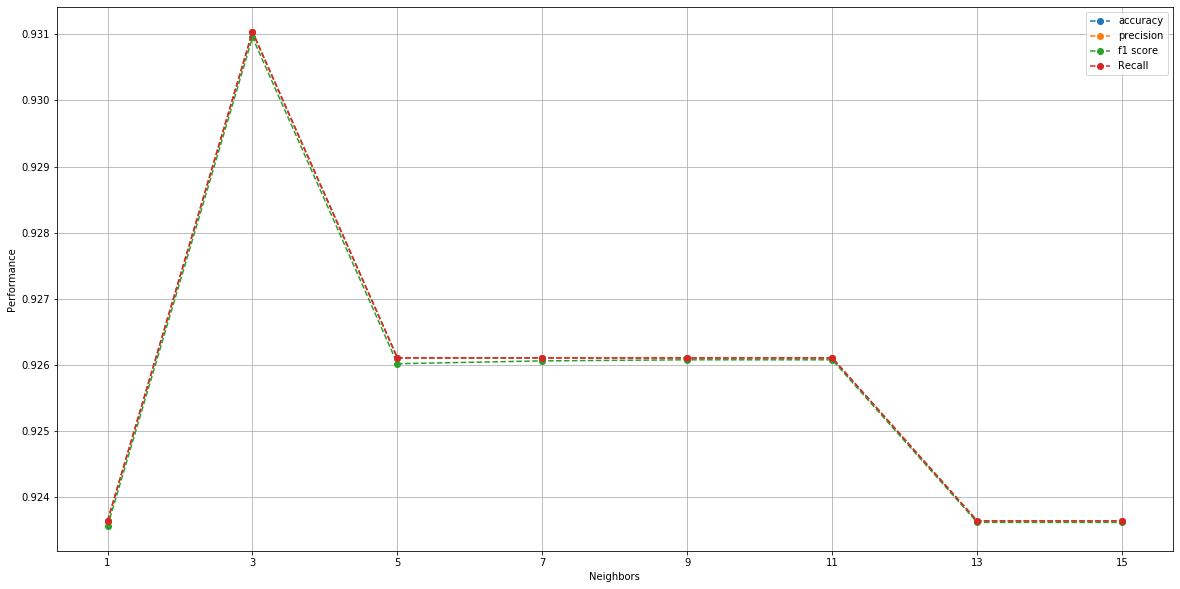

In [24]:
import matplotlib.pyplot as plt
def KNN(train_x, x_test, train_y, y_test):
    neighbors = [1,3,5,7,9,11,13,15]
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    for i in neighbors:
        nbrs = KNeighborsClassifier(n_neighbors=i,weights='distance',p=2)
        nbrs.fit(train_x, train_y)
        prediction = nbrs.predict(x_test)
#         print("------KNN---------Evaluate----------------")
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction,average='micro')
#         print("accuracy is ", accuracy)
#         print("precision is", precision)
#         print("recall is", recall)
        f1 = f1_score(y_test, prediction, average='macro')
        
#         print("f1 score is",f1)
#         print('')
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        print('neighbors =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
    return acc_list, pre_list, f1_list, rec_list,neighbors

accuracy_KNN, precision_KNN, f1_score_KNN,recall_KNN,neighbors = KNN(X_train, X_test, y_train, y_test)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(neighbors,accuracy_KNN,label='accuracy',marker='o', linestyle='--',)
plt.plot(neighbors,precision_KNN,label = 'precision',marker='o', linestyle='--',)
plt.plot(neighbors, f1_score_KNN,label = 'f1 score',marker='o', linestyle='--',)
plt.plot(neighbors, recall_KNN,label='Recall',marker='o', linestyle='--',)
plt.xlabel('Neighbors')
plt.ylabel('Performance')
plt.xticks(neighbors, neighbors)
plt.legend()
plt.show()

[11  1  0 10  7  6 14  4  9 12  3  2  8 13  5]
Feature ranking:
1. feature 11 (0.196981) Status_code
2. feature 1 (0.179109) Reachable_URL
3. feature 0 (0.153517) Created on 2020
4. feature 10 (0.138115) Alexa_rank
5. feature 7 (0.067729) Longest_word_ratio
6. feature 6 (0.066360) Wrong_spell_List
7. feature 14 (0.065035) Redirect_URL
8. feature 4 (0.058977) Previous_malicious_top_level_domain_TLD
9. feature 9 (0.041357) Contain_Weried_number_combination
10. feature 12 (0.019624) start_date
11. feature 3 (0.007375) Freenom_top_level_domain
12. feature 2 (0.003508) Way_back_archived
13. feature 8 (0.001861) sub_domain
14. feature 13 (0.000305) wildcard_subdomain
15. feature 5 (0.000146) Name_length


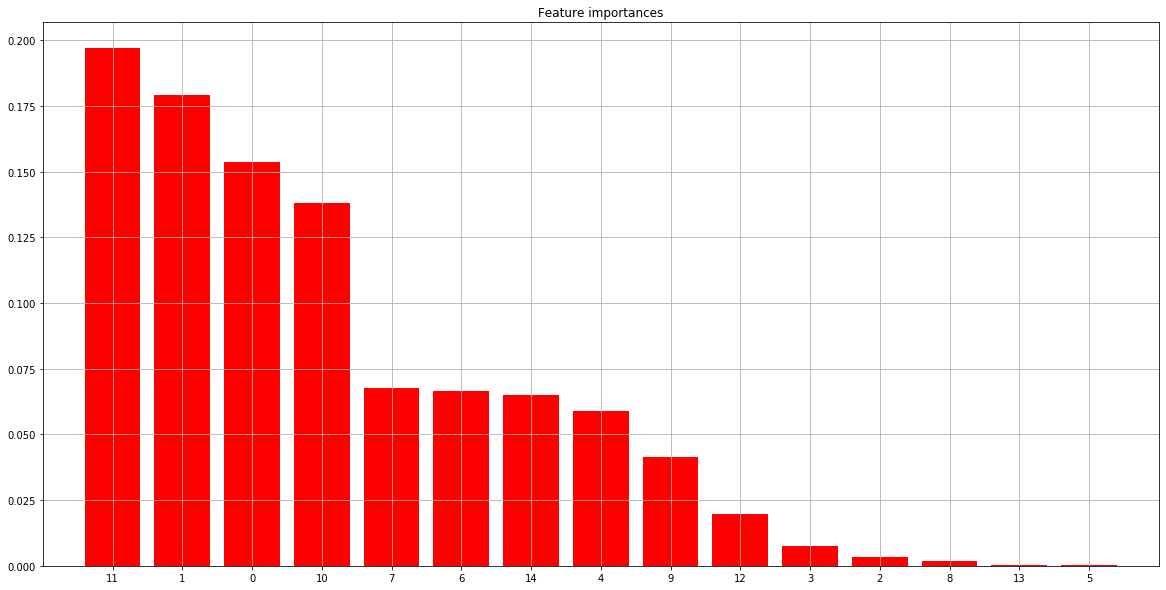

In [27]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
def Feature_importance(train_x, x_test, train_y, y_test):
    forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

    forest.fit(train_x, train_y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
              axis=0)
    indices = np.argsort(importances)[::-1]
    print(indices)
    # Print the feature ranking
    print("Feature ranking:")
    features_all_rank = []
    for f in range(train_x.shape[1]):
        features_all_rank.append(Features[indices[f]-1])
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),Features[indices[f]-1])

    # Plot the feature importances of the forest
    plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.title("Feature importances")
    plt.bar(range(train_x.shape[1]), importances[indices],
        color="r",  align="center")
    plt.xticks(range(train_x.shape[1]), indices)
    plt.xlim([-1, train_x.shape[1]])
    plt.show()
Feature_importance(X_train, X_test, y_train, y_test)

depth = 1 accuracy: 0.9310344827586207 precision: 0.9310344827586207 recall: 0.9310344827586207 f1_score: 0.9308986578486675
depth = 2 accuracy: 0.9285714285714286 precision: 0.9285714285714286 recall: 0.9285714285714286 f1_score: 0.9285501890319017
depth = 3 accuracy: 0.9359605911330049 precision: 0.9359605911330049 recall: 0.9359605911330049 f1_score: 0.9359466019417476
depth = 4 accuracy: 0.9408866995073891 precision: 0.9408866995073891 recall: 0.9408866995073891 f1_score: 0.9408508158508159
depth = 5 accuracy: 0.9458128078817734 precision: 0.9458128078817734 recall: 0.9458128078817734 f1_score: 0.9457654288004274
depth = 6 accuracy: 0.9458128078817734 precision: 0.9458128078817734 recall: 0.9458128078817734 f1_score: 0.9457654288004274
depth = 7 accuracy: 0.9433497536945813 precision: 0.9433497536945813 recall: 0.9433497536945813 f1_score: 0.9432916127700146
depth = 8 accuracy: 0.9408866995073891 precision: 0.9408866995073891 recall: 0.9408866995073891 f1_score: 0.9407702781560008


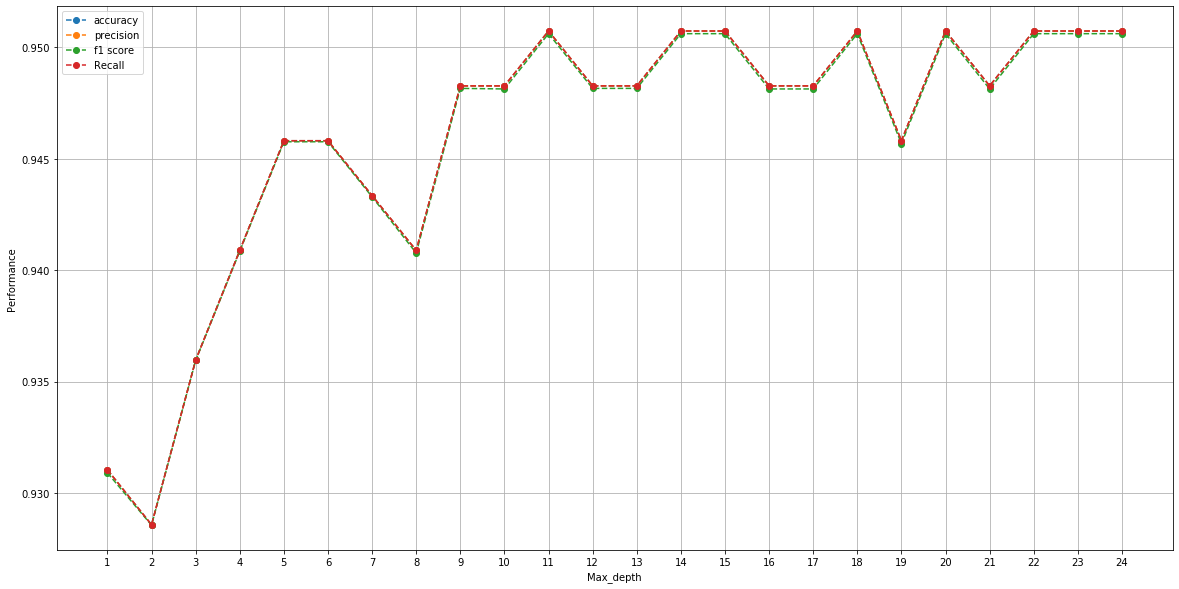

In [34]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
def RandomForest(train_x, x_test, train_y, y_test):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    for i in max_depth:
        clf = RandomForestClassifier(n_estimators=250,max_depth=i, max_features='auto')
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
    return acc_list, pre_list, f1_list, rec_list

accuracy_RF, precision_RF, f1_score_RF, recall_RF = RandomForest(X_train, X_test, y_train, y_test)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(max_depth,accuracy_RF,label='accuracy',marker='o', linestyle='--',)
plt.plot(max_depth,precision_RF,label = 'precision',marker='o', linestyle='--',)
plt.plot(max_depth, f1_score_RF,label = 'f1 score',marker='o', linestyle='--',)
plt.plot(max_depth, recall_RF,label='Recall',marker='o', linestyle='--',)
plt.xlabel('Max_depth')
plt.ylabel('Performance')
plt.xticks(max_depth, max_depth)
plt.legend()
plt.show()


depth = 1 accuracy: 0.9285714285714286 precision: 0.9285714285714286 recall: 0.9285714285714286 f1_score: 0.9284459759217731
depth = 2 accuracy: 0.9334975369458128 precision: 0.9334975369458128 recall: 0.9334975369458128 f1_score: 0.9334486840907021
depth = 3 accuracy: 0.9285714285714286 precision: 0.9285714285714286 recall: 0.9285714285714286 f1_score: 0.9284981204491489
depth = 4 accuracy: 0.9334975369458128 precision: 0.9334975369458128 recall: 0.9334975369458128 f1_score: 0.9334486840907021
depth = 5 accuracy: 0.9433497536945813 precision: 0.9433497536945813 recall: 0.9433497536945813 f1_score: 0.943308138299487
depth = 6 accuracy: 0.9458128078817734 precision: 0.9458128078817734 recall: 0.9458128078817734 f1_score: 0.9457654288004274
depth = 7 accuracy: 0.9384236453201971 precision: 0.9384236453201971 recall: 0.9384236453201971 f1_score: 0.9383604486630595
depth = 8 accuracy: 0.9384236453201971 precision: 0.9384236453201971 recall: 0.9384236453201971 f1_score: 0.9383394791356593
d

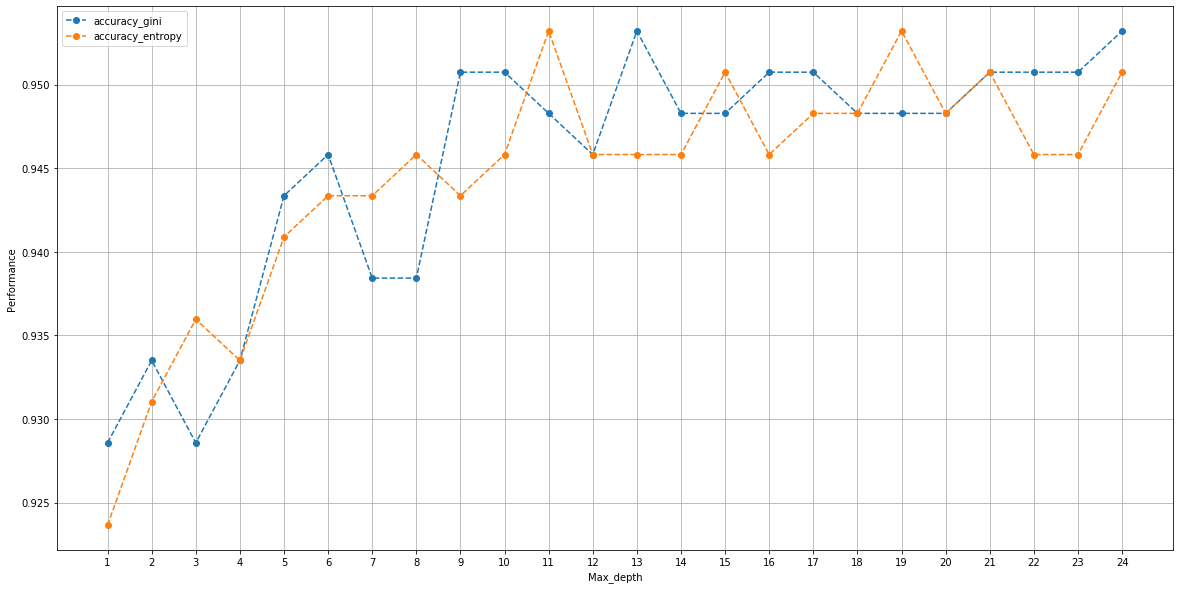

In [48]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
def RandomForest(train_x, x_test, train_y, y_test):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    acc_list2 = []
    pre_list2 = []
    rec_list2 = []
    f1_list2 = []
    for i in max_depth:
        clf = RandomForestClassifier(n_estimators=250,max_depth=i, max_features='auto',criterion = 'gini')
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
        
    for i in max_depth:
        clf = RandomForestClassifier(n_estimators=250,max_depth=i, max_features='auto',criterion = 'entropy')
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list2.append(accuracy)
        pre_list2.append(precision)
        f1_list2.append(f1)
        rec_list2.append(recall)
#         print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
    return acc_list, pre_list, f1_list, rec_list,acc_list2, pre_list2, f1_list2, rec_list2

accuracy_RF, precision_RF, f1_score_RF, recall_RF,accuracy_RF2, precision_RF2, f1_score_RF2, recall_RF2 = RandomForest(X_train, X_test, y_train, y_test)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(max_depth,accuracy_RF,label='accuracy_gini',marker='o', linestyle='--',)
# plt.plot(max_depth,precision_RF,label = 'precision_gini',marker='o', linestyle='--',)
# plt.plot(max_depth, f1_score_RF,label = 'f1 score_gini',marker='o', linestyle='--',)
# plt.plot(max_depth, recall_RF,label='Recall_gini',marker='o', linestyle='--',)
plt.plot(max_depth,accuracy_RF2,label='accuracy_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth,precision_RF2,label = 'precision_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth, f1_score_RF2,label = 'f1 score_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth, recall_RF2,label='Recall_entropy',marker='o', linestyle='--',)
plt.xlabel('Max_depth')
plt.ylabel('Performance')
plt.xticks(max_depth, max_depth)
plt.legend()
plt.show()


In [49]:
max(accuracy_RF)

0.9532019704433498

depth = 1 accuracy: 0.9285714285714286 precision: 0.9285714285714286 recall: 0.9285714285714286 f1_score: 0.9283798169044071
depth = 2 accuracy: 0.896551724137931 precision: 0.896551724137931 recall: 0.896551724137931 f1_score: 0.8957319310260486
depth = 3 accuracy: 0.9408866995073891 precision: 0.9408866995073891 recall: 0.9408866995073891 f1_score: 0.9407429030139385
depth = 4 accuracy: 0.9187192118226601 precision: 0.9187192118226601 recall: 0.9187192118226601 f1_score: 0.9178817688700929
depth = 5 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580157547370662
depth = 6 accuracy: 0.9630541871921182 precision: 0.9630541871921182 recall: 0.9630541871921182 f1_score: 0.9629352370866731
depth = 7 accuracy: 0.9556650246305419 precision: 0.9556650246305419 recall: 0.9556650246305419 f1_score: 0.9555344626168225
depth = 8 accuracy: 0.9384236453201971 precision: 0.9384236453201971 recall: 0.9384236453201971 f1_score: 0.9382253951444552
depth 

depth = 69 accuracy: 0.9458128078817734 precision: 0.9458128078817734 recall: 0.9458128078817734 f1_score: 0.9457060883096673
depth = 70 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9505938473520249
depth = 71 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481623347013224
depth = 72 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 73 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481623347013224
depth = 74 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 75 accuracy: 0.9458128078817734 precision: 0.9458128078817734 recall: 0.9458128078817734 f1_score: 0.9457060883096673
depth = 76 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.948137108

depth = 135 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 136 accuracy: 0.9433497536945813 precision: 0.9433497536945813 recall: 0.9433497536945813 f1_score: 0.9432254141966864
depth = 137 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481623347013224
depth = 138 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 139 accuracy: 0.9532019704433498 precision: 0.9532019704433498 recall: 0.9532019704433498 f1_score: 0.953051300309786
depth = 140 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 141 accuracy: 0.9532019704433498 precision: 0.9532019704433498 recall: 0.9532019704433498 f1_score: 0.9530764317649564
depth = 142 accuracy: 0.9458128078817734 precision: 0.9458128078817734 recall: 0.9458128078817734 f1_score: 0.94

depth = 200 accuracy: 0.9433497536945813 precision: 0.9433497536945813 recall: 0.9433497536945813 f1_score: 0.9432254141966864
depth = 201 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481623347013224
depth = 202 accuracy: 0.9532019704433498 precision: 0.9532019704433498 recall: 0.9532019704433498 f1_score: 0.9530764317649564
depth = 203 accuracy: 0.9458128078817734 precision: 0.9458128078817734 recall: 0.9458128078817734 f1_score: 0.9457060883096673
depth = 204 accuracy: 0.9458128078817734 precision: 0.9458128078817734 recall: 0.9458128078817734 f1_score: 0.9456809944294436
depth = 205 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481623347013224
depth = 206 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481371087928465
depth = 207 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9

depth = 265 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 266 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9505938473520249
depth = 267 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 268 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 269 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481371087928465
depth = 270 accuracy: 0.9532019704433498 precision: 0.9532019704433498 recall: 0.9532019704433498 f1_score: 0.9530764317649564
depth = 271 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481371087928465
depth = 272 accuracy: 0.9532019704433498 precision: 0.9532019704433498 recall: 0.9532019704433498 f1_score: 0.9

depth = 330 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481371087928465
depth = 331 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481623347013224
depth = 332 accuracy: 0.9532019704433498 precision: 0.9532019704433498 recall: 0.9532019704433498 f1_score: 0.9530764317649564
depth = 333 accuracy: 0.9458128078817734 precision: 0.9458128078817734 recall: 0.9458128078817734 f1_score: 0.9457060883096673
depth = 334 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481623347013224
depth = 335 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481371087928465
depth = 336 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 337 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9

depth = 395 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9505938473520249
depth = 396 accuracy: 0.9532019704433498 precision: 0.9532019704433498 recall: 0.9532019704433498 f1_score: 0.9530764317649564
depth = 397 accuracy: 0.9532019704433498 precision: 0.9532019704433498 recall: 0.9532019704433498 f1_score: 0.9530764317649564
depth = 398 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9505938473520249
depth = 399 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 400 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 401 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 402 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9

depth = 460 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 461 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481623347013224
depth = 462 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481623347013224
depth = 463 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481371087928465
depth = 464 accuracy: 0.9532019704433498 precision: 0.9532019704433498 recall: 0.9532019704433498 f1_score: 0.9530764317649564
depth = 465 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 466 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9506190858449488
depth = 467 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9

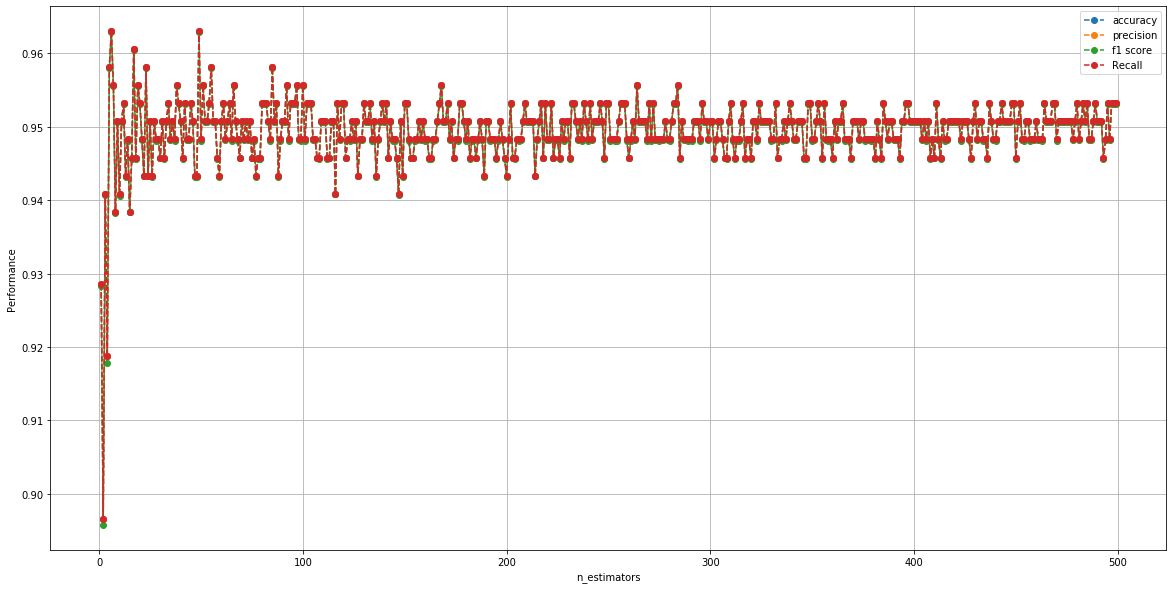

In [50]:
n_estimators = list(range(1,500))
def RandomForest(train_x, x_test, train_y, y_test):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    for i in n_estimators:
        clf = RandomForestClassifier(n_estimators=i,max_depth=13, max_features='auto',criterion = 'gini')
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        
        print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
    return acc_list, pre_list, f1_list, rec_list

accuracy_RF, precision_RF, f1_score_RF, recall_RF = RandomForest(X_train, X_test, y_train, y_test)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(n_estimators,accuracy_RF,label='accuracy',marker='o', linestyle='--',)
plt.plot(n_estimators,precision_RF,label = 'precision',marker='o', linestyle='--',)
plt.plot(n_estimators, f1_score_RF,label = 'f1 score',marker='o', linestyle='--',)
plt.plot(n_estimators, recall_RF,label='Recall',marker='o', linestyle='--',)
plt.xlabel('n_estimators')
plt.ylabel('Performance')
# plt.xticks(n_estimators, n_estimators)
plt.legend()
plt.show()


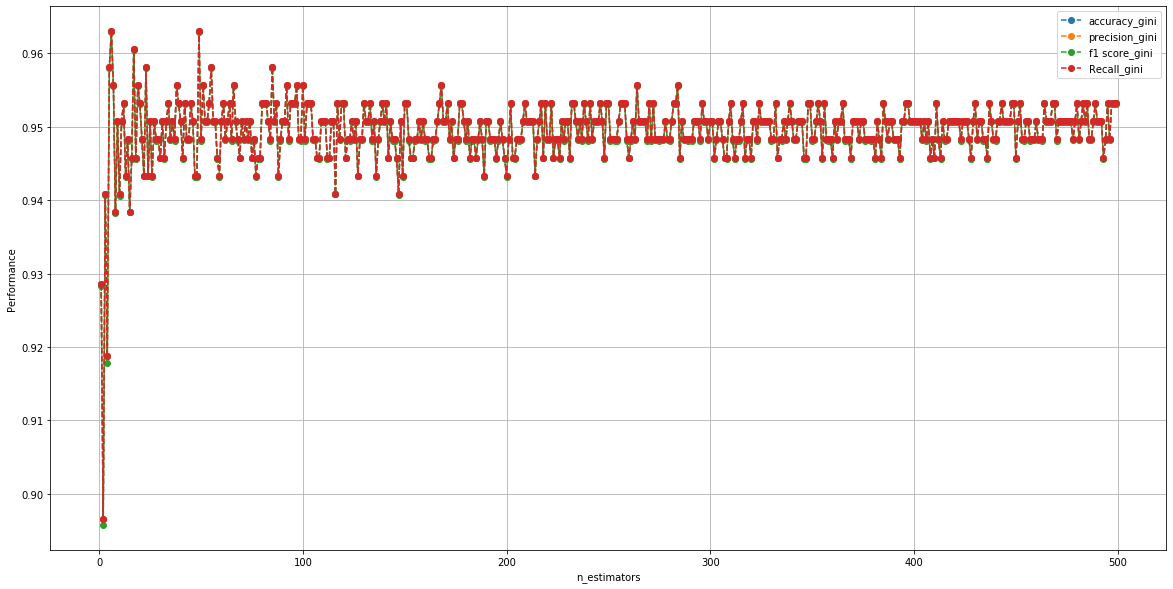

In [53]:
# accuracy_RF, precision_RF, f1_score_RF, recall_RF = RandomForest(X_train, X_test, y_train, y_test)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(n_estimators,accuracy_RF,label='accuracy_gini',marker='o', linestyle='--',)
plt.plot(n_estimators,precision_RF,label = 'precision_gini',marker='o', linestyle='--',)
plt.plot(n_estimators, f1_score_RF,label = 'f1 score_gini',marker='o', linestyle='--',)
plt.plot(n_estimators, recall_RF,label='Recall_gini',marker='o', linestyle='--',)
plt.xlabel('n_estimators')
plt.ylabel('Performance')
# plt.xticks(n_estimators, n_estimators)
plt.legend()
plt.show()

In [54]:
print('best estimator:',accuracy_RF.index(max(accuracy_RF)))
print('best estimator:',precision_RF.index(max(precision_RF)))
print(max(accuracy_RF))
print(max(precision_RF))
print(max(f1_score_RF))
print(max(recall_RF))

best estimator: 5
best estimator: 5
0.9630541871921182
0.9630541871921182
0.9629352370866731
0.9630541871921182


depth = 1 accuracy: 0.8793103448275862 precision: 0.8793103448275862 recall: 0.8793103448275862 f1_score: 0.878507697850953
depth = 2 accuracy: 0.8940886699507389 precision: 0.8940886699507389 recall: 0.8940886699507389 f1_score: 0.893618188133352
depth = 3 accuracy: 0.9039408866995073 precision: 0.9039408866995073 recall: 0.9039408866995073 f1_score: 0.9036316164253501
depth = 4 accuracy: 0.9137931034482759 precision: 0.9137931034482759 recall: 0.9137931034482759 f1_score: 0.9135618479880776
depth = 5 accuracy: 0.9236453201970444 precision: 0.9236453201970444 recall: 0.9236453201970444 f1_score: 0.9234777321781424
depth = 6 accuracy: 0.9261083743842364 precision: 0.9261083743842364 recall: 0.9261083743842364 f1_score: 0.9259286287674231
depth = 7 accuracy: 0.9334975369458128 precision: 0.9334975369458128 recall: 0.9334975369458128 f1_score: 0.9333807362030302
depth = 8 accuracy: 0.9384236453201971 precision: 0.9384236453201971 recall: 0.9384236453201971 f1_score: 0.9383154964842871
de

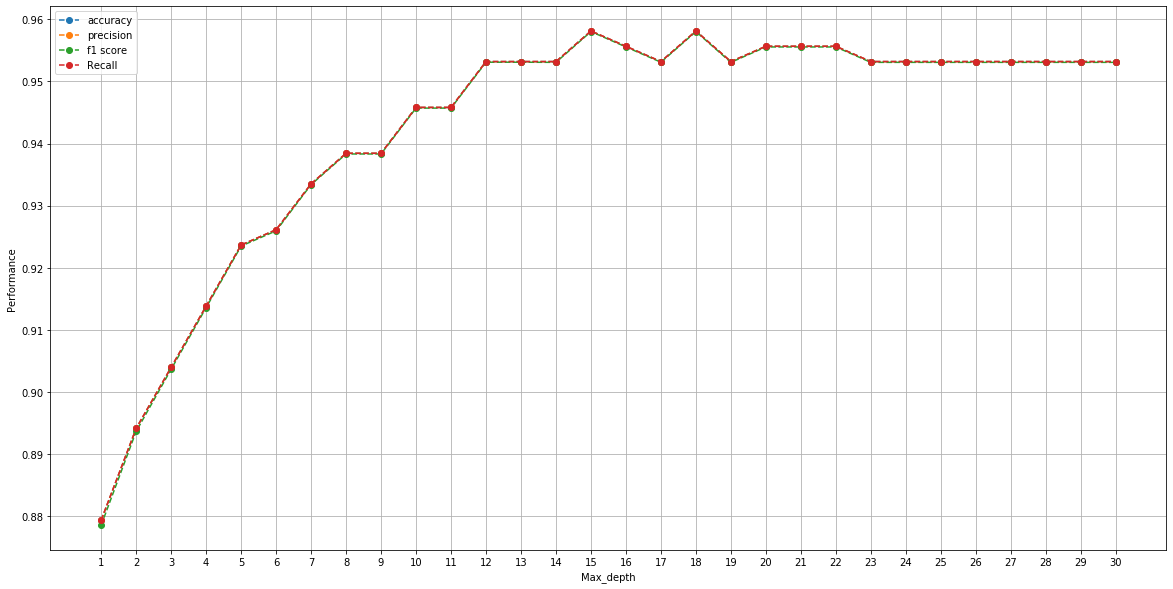

In [58]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
def Extratree(train_x, x_test, train_y, y_test):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    for i in max_depth:
        clf = ExtraTreesClassifier(n_estimators=250,max_depth=i,
                              random_state=0)
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
    return acc_list, pre_list, f1_list, rec_list

accuracy_ET, precision_ET, f1_score_ET, recall_ET = Extratree(X_train, X_test, y_train, y_test)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(max_depth,accuracy_ET,label='accuracy',marker='o', linestyle='--',)
plt.plot(max_depth,precision_ET,label = 'precision',marker='o', linestyle='--',)
plt.plot(max_depth, f1_score_ET,label = 'f1 score',marker='o', linestyle='--',)
plt.plot(max_depth, recall_ET,label='Recall',marker='o', linestyle='--',)
plt.xlabel('Max_depth')
plt.ylabel('Performance')
plt.xticks(max_depth, max_depth)
plt.legend()
plt.show()


depth = 1 accuracy: 0.8793103448275862 precision: 0.8793103448275862 recall: 0.8793103448275862 f1_score: 0.878507697850953
depth = 2 accuracy: 0.8940886699507389 precision: 0.8940886699507389 recall: 0.8940886699507389 f1_score: 0.893618188133352
depth = 3 accuracy: 0.9039408866995073 precision: 0.9039408866995073 recall: 0.9039408866995073 f1_score: 0.9036316164253501
depth = 4 accuracy: 0.9137931034482759 precision: 0.9137931034482759 recall: 0.9137931034482759 f1_score: 0.9135618479880776
depth = 5 accuracy: 0.9236453201970444 precision: 0.9236453201970444 recall: 0.9236453201970444 f1_score: 0.9234777321781424
depth = 6 accuracy: 0.9261083743842364 precision: 0.9261083743842364 recall: 0.9261083743842364 f1_score: 0.9259286287674231
depth = 7 accuracy: 0.9334975369458128 precision: 0.9334975369458128 recall: 0.9334975369458128 f1_score: 0.9333807362030302
depth = 8 accuracy: 0.9384236453201971 precision: 0.9384236453201971 recall: 0.9384236453201971 f1_score: 0.9383154964842871
de

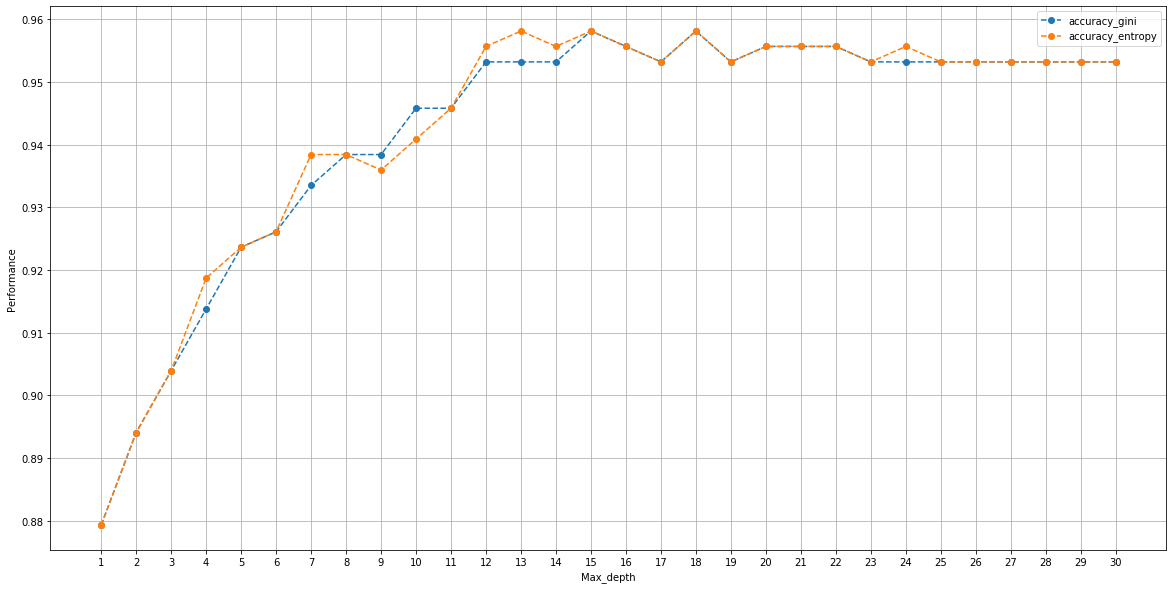

In [61]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
def Extratree(train_x, x_test, train_y, y_test):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    acc_list2 = []
    pre_list2 = []
    rec_list2 = []
    f1_list2 = []
    for i in max_depth:
        clf = ExtraTreesClassifier(n_estimators=250,max_depth=i,criterion='gini',
                              random_state=0)
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
        
    for i in max_depth:
        clf = ExtraTreesClassifier(n_estimators=250,max_depth=i,criterion='entropy',
                              random_state=0)
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list2.append(accuracy)
        pre_list2.append(precision)
        f1_list2.append(f1)
        rec_list2.append(recall)
#         print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
    return acc_list, pre_list, f1_list, rec_list,acc_list2, pre_list2, f1_list2, rec_list2

accuracy_ET, precision_ET, f1_score_ET, recall_ET,accuracy_ET2, precision_ET2, f1_score_ET2, recall_ET2 = Extratree(X_train, X_test, y_train, y_test)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(max_depth,accuracy_ET,label='accuracy_gini',marker='o', linestyle='--',)
# plt.plot(max_depth,precision_RF,label = 'precision_gini',marker='o', linestyle='--',)
# plt.plot(max_depth, f1_score_RF,label = 'f1 score_gini',marker='o', linestyle='--',)
# plt.plot(max_depth, recall_RF,label='Recall_gini',marker='o', linestyle='--',)
plt.plot(max_depth,accuracy_ET2,label='accuracy_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth,precision_RF2,label = 'precision_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth, f1_score_RF2,label = 'f1 score_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth, recall_RF2,label='Recall_entropy',marker='o', linestyle='--',)
plt.xlabel('Max_depth')
plt.ylabel('Performance')
plt.xticks(max_depth, max_depth)
plt.legend()
plt.show()


n_estimators = 1 accuracy: 0.9137931034482759 precision: 0.9137931034482759 recall: 0.9137931034482759 f1_score: 0.9135618479880776
n_estimators = 2 accuracy: 0.9211822660098522 precision: 0.9211822660098522 recall: 0.9211822660098522 f1_score: 0.9206895709716016
n_estimators = 3 accuracy: 0.9482758620689655 precision: 0.9482758620689655 recall: 0.9482758620689655 f1_score: 0.9481850170468011
n_estimators = 4 accuracy: 0.9507389162561576 precision: 0.9507389162561576 recall: 0.9507389162561576 f1_score: 0.9505360623781676
n_estimators = 5 accuracy: 0.9384236453201971 precision: 0.9384236453201971 recall: 0.9384236453201971 f1_score: 0.9382884936920505
n_estimators = 6 accuracy: 0.9408866995073891 precision: 0.9408866995073891 recall: 0.9408866995073891 f1_score: 0.9407126168224298
n_estimators = 7 accuracy: 0.9359605911330049 precision: 0.9359605911330049 recall: 0.9359605911330049 f1_score: 0.9358344680023342
n_estimators = 8 accuracy: 0.9458128078817734 precision: 0.9458128078817734 

n_estimators = 63 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 64 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 65 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 66 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 67 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 68 accuracy: 0.9556650246305419 precision: 0.9556650246305419 recall: 0.9556650246305419 f1_score: 0.9555571772604539
n_estimators = 69 accuracy: 0.9556650246305419 precision: 0.9556650246305419 recall: 0.9556650246305419 f1_score: 0.9555571772604539
n_estimators = 70 accuracy: 0.9556650246305419 precision: 0.9556650246305419 recall:

n_estimators = 127 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 128 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 129 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 130 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 131 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 132 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 133 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 134 accuracy: 0.958128078817734 precision: 0.958128078817734 recall:

n_estimators = 191 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 192 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 193 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 194 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 195 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 196 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 197 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 198 accuracy: 0.958128078817734 precision: 0.958128078817734 recall:

n_estimators = 254 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 255 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 256 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 257 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 258 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 259 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 260 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 261 accuracy: 0.958128078817734 precision: 0.958128078817734 recall:

n_estimators = 317 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 318 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 319 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 320 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 321 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 322 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 323 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 324 accuracy: 0.958128078817734 precision: 0.958128078817734 recall:

n_estimators = 380 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 381 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 382 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 383 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 384 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 385 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 386 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 387 accuracy: 0.958128078817734 precision: 0.958128078817734 recall:

n_estimators = 443 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 444 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 445 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 446 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 447 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 448 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 449 accuracy: 0.958128078817734 precision: 0.958128078817734 recall: 0.958128078817734 f1_score: 0.9580361757105943
n_estimators = 450 accuracy: 0.958128078817734 precision: 0.958128078817734 recall:

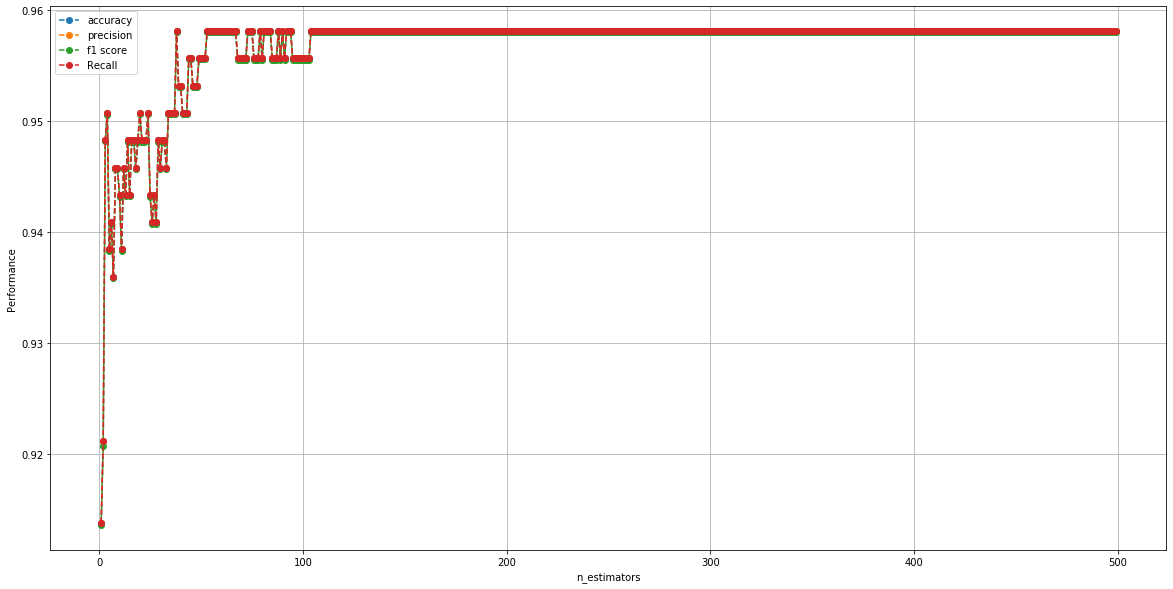

In [30]:
n_estimators = list(range(1,500))
def Extratree(train_x, x_test, train_y, y_test):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    for i in n_estimators:
        clf = ExtraTreesClassifier(n_estimators=i,max_depth=15,
                              random_state=0)
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        
        print('n_estimators =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
    return acc_list, pre_list, f1_list, rec_list

accuracy_ET, precision_ET, f1_score_ET, recall_ET = Extratree(X_train, X_test, y_train, y_test)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(n_estimators,accuracy_ET,label='accuracy',marker='o', linestyle='--',)
plt.plot(n_estimators,precision_ET,label = 'precision',marker='o', linestyle='--',)
plt.plot(n_estimators, f1_score_ET,label = 'f1 score',marker='o', linestyle='--',)
plt.plot(n_estimators, recall_ET,label='Recall',marker='o', linestyle='--',)
plt.xlabel('n_estimators')
plt.ylabel('Performance')
# plt.xticks(n_estimators, n_estimators)
plt.legend()
plt.show()


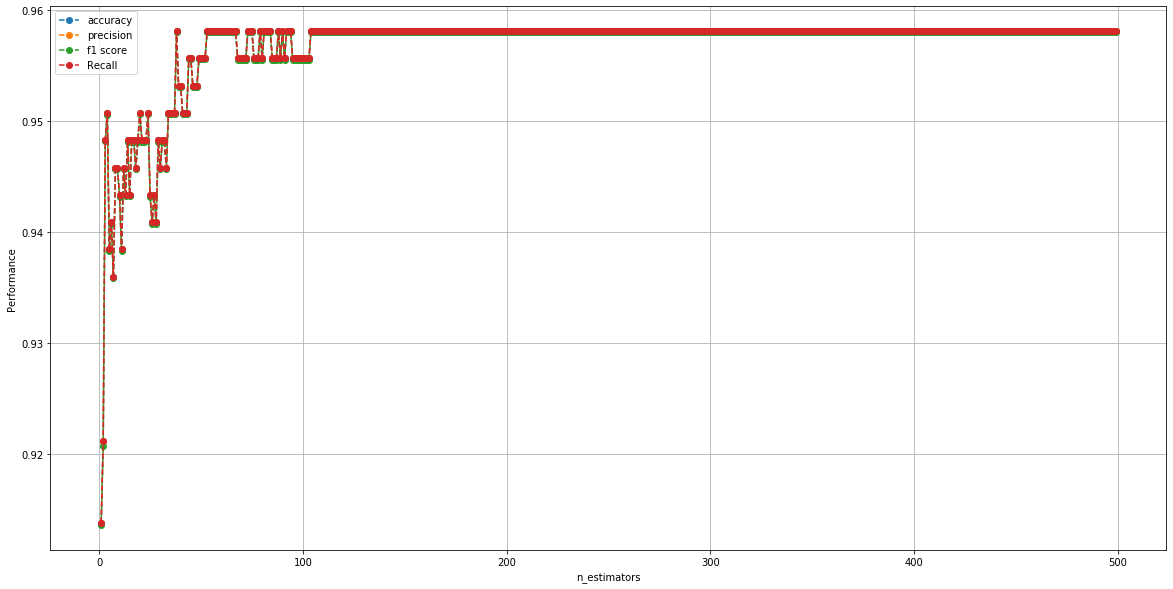

In [31]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(n_estimators,accuracy_ET,label='accuracy',marker='o', linestyle='--',)
plt.plot(n_estimators,precision_ET,label = 'precision',marker='o', linestyle='--',)
plt.plot(n_estimators, f1_score_ET,label = 'f1 score',marker='o', linestyle='--',)
plt.plot(n_estimators, recall_ET,label='Recall',marker='o', linestyle='--',)
plt.xlabel('n_estimators')
plt.ylabel('Performance')
# plt.xticks(n_estimators, n_estimators)
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC
degree = [3,4,5,6,7,8,9,10,11,12]

def SVM(train_x, x_test, train_y, y_test):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    acc_list2 = []
    pre_list2 = []
    rec_list2 = []
    f1_list2 = []
    acc_list3 = []
    pre_list3 = []
    rec_list3 = []
    f1_list3 = []
    acc_list4 = []
    pre_list4 = []
    rec_list4 = []
    f1_list4 = []
    acc_list5 = []
    pre_list5 = []
    rec_list5 = []
    f1_list5 = []
    for i in degree:
        clf = SVC(degree=i,kernel = 'linear')
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        print('degree =',i,'accuracy=',accuracy)
    for i in degree:
        clf = SVC(degree=i,kernel = 'poly')
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list2.append(accuracy)
        pre_list2.append(precision)
        f1_list2.append(f1)
        rec_list2.append(recall) 
        print('degree =',i,'accuracy=',accuracy)
    for i in degree:
        clf = SVC(degree=i,kernel = 'rbf')
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list3.append(accuracy)
        pre_list3.append(precision)
        f1_list3.append(f1)
        rec_list3.append(recall)
        print('degree =',i,'accuracy=',accuracy)
    for i in degree:
        clf = SVC(degree=i,kernel = 'sigmoid')
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list4.append(accuracy)
        pre_list4.append(precision)
        f1_list4.append(f1)
        print('degree =',i,'accuracy=',accuracy)
        rec_list4.append(recall)
    for i in degree:
        clf = SVC(degree=i,kernel = 'precomputed')
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list5.append(accuracy)
        pre_list5.append(precision)
        f1_list5.append(f1)
        rec_list5.append(recall)

    return acc_list, acc_list2,acc_list3,acc_list4,acc_list5


acc_list, acc_list2,acc_list3,acc_list4,acc_list5 = SVM(X_train, X_test, y_train, y_test)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(degree,acc_list,label='accuracy_linear',marker='o', linestyle='--',)
plt.plot(degree,acc_list2,label = 'accuracy_poly',marker='o', linestyle='--',)
plt.plot(degree, acc_list3,label = 'accuracy_rbf',marker='o', linestyle='--',)
plt.plot(degree, acc_list4,label='accuracy_sigmoid',marker='o', linestyle='--',)
plt.plot(degree, acc_list5,label='accuracy_precomputed',marker='o', linestyle='--',)
plt.xlabel('degree')
plt.ylabel('Performance')
# plt.xticks(n_estimators, n_estimators)
plt.legend()
plt.show()

In [18]:
def naive_bayes(train_x, x_test, train_y, y_test):
    clf = GaussianNB()
    clf.fit(train_x, train_y)
    prediction = clf.predict(x_test)
    print("------BAYES---------Evaluate----------------")
    recall = recall_score(y_test, prediction,average='micro')
    accuracy = accuracy_score(y_test, prediction)
    cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
    precision = precision_score(y_test, prediction,average='micro')
    print('cross score is', cross_val)
    print("accuracy is ", accuracy)
    print("precision is", precision)
    print("recall is", recall)
    f1 = f1_score(y_test, prediction, average='macro')
    print("f1 score is",f1)
    print('')
    confusion_matrix1 = confusion_matrix(y_test, prediction, labels=[0, 1])
    print(confusion_matrix1)    
    return accuracy, precision, recall, cross_val

accuracy_NB, precision_NB, recall_NB,f1_score_NB = naive_bayes(X_train, X_test, y_train, y_test)

------BAYES---------Evaluate----------------
cross score is [0.77108434 0.81927711 0.84337349 0.79268293 0.85365854 0.79268293
 0.80487805 0.87804878 0.82926829 0.82926829]
accuracy is  0.7980295566502463
precision is 0.7980295566502463
recall is 0.7980295566502463
f1 score is 0.7980295566502463

[[162  51]
 [ 31 162]]


In [19]:
X_train.shape

(823, 15)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import keras
batch_size = 100
epochs = 30
model = Sequential()
model.add(Dense(15, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()
opt = keras.optimizers.SGD(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=batch_size,                   
                    epochs=epochs,
                    verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                240       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==============================] - 0s 821us/step - loss: 5769.2480 - accuracy: 0.7060
Epoch 2/30
9/9 [==============================] - 0s 870us/step - loss: 10.2943 - accuracy: 0.7898
Epoch 3/30
9/9 [==============================] - 0s 810us/step - loss: 6.1789 - accuracy: 0.8068
Epoch 4/30
9/9 [==============================] - 0s 989us/step - loss: 2.5833 - accuracy:

In [21]:
prediction = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [22]:
prediction_mlp = []
for i in prediction:
    prediction_mlp.append(i[0])

In [23]:
prediction = prediction_mlp
print("------MLP---------Evaluate----------------")
recall = recall_score(y_test, prediction,average='micro')
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction,average='micro')
print("accuracy is ", accuracy)
print("precision is", precision)
print("recall is", recall)
f1 = f1_score(y_test, prediction, average='macro')
print("f1 score is",f1)
print('')

------MLP---------Evaluate----------------
accuracy is  0.7487684729064039
precision is 0.7487684729064039
recall is 0.7487684729064039
f1 score is 0.744244071146245

